In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [168]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [169]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [170]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [171]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [172]:
X = df.drop(columns='total_score', axis=1)

In [173]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [174]:
y = df['total_score']

In [175]:
num_columns = X.select_dtypes(exclude='object').columns

In [176]:
num_columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [177]:
cate_columns = X.select_dtypes(include=['object']).columns

In [178]:
cate_columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [179]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [180]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()

In [181]:
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', scaler, num_columns),
        ('OneHotEncoder', one_hot_encoder, cate_columns)
    ]
)

In [182]:
# X = preprocessor.fit_transform(X)

In [183]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [216]:
linear_model = LinearRegression()
decision_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
xg_model = XGBRFRegressor(enable_categorical=True)


In [217]:
linear_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', linear_model)
    ]
)

In [218]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [219]:
linear_pred = linear_pipeline.predict(X_test)

In [220]:
linear_pred

array([261., 192., 225., 224., 245., 234., 202., 177., 232., 146., 141.,
        78., 228., 175., 251., 225., 147., 145., 160., 184., 220., 148.,
       188., 132., 238., 232., 216., 150., 123., 167., 180., 201., 181.,
       219., 232., 153., 228., 223., 225.,  27., 234., 193., 196., 184.,
       252., 197., 213.,  88., 259., 236., 216., 214., 236., 162., 215.,
       217., 249., 164., 245., 267., 130., 242., 237., 185., 263., 221.,
       195., 164., 194., 266., 193., 259., 169., 150., 180., 230., 269.,
       170., 179., 147., 184., 119., 234., 206., 203., 193., 223., 204.,
       252.,  70., 231., 289., 184., 213.,  89., 207., 182., 195., 220.,
       194., 223., 175., 177., 205., 209., 195., 138., 227., 229., 157.,
       117., 240., 162., 168., 247., 172., 146., 144., 210., 235., 190.,
       191., 246., 220., 198., 201., 228., 218., 144., 208., 228., 224.,
       142., 282., 206., 117., 260., 242., 219., 140., 160., 196., 173.,
       139., 237., 162., 118., 218., 152., 240., 23

In [221]:
decision_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', decision_model)
    ]
)

In [222]:
decision_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [223]:
decision_pred = decision_pipeline.predict(X_test)

In [224]:
decision_pred

array([261., 191., 223., 221., 244., 237., 206., 177., 232., 155., 140.,
        69., 224., 179., 245., 225., 140., 145., 158., 182., 219., 149.,
       193., 134., 230., 237., 215., 147., 132., 170., 181., 201., 178.,
       220., 236., 155., 227., 223., 221.,  55., 232., 194., 198., 185.,
       247., 196., 212.,  78., 262., 238., 213., 216., 232., 162., 218.,
       213., 242., 167., 247., 270., 113., 237., 233., 183., 259., 219.,
       194., 164., 196., 275., 192., 259., 168., 159., 182., 228., 270.,
       166., 169., 147., 186., 119., 235., 202., 204., 190., 223., 202.,
       250.,  69., 230., 278., 178., 209.,  94., 207., 182., 195., 214.,
       200., 221., 177., 177., 204., 214., 197., 134., 229., 231., 147.,
       140., 248., 161., 169., 247., 172., 145., 147., 212., 240., 180.,
       190., 245., 222., 197., 202., 230., 216., 142., 206., 225., 219.,
       142., 282., 209., 113., 257., 238., 215., 146., 159., 200., 177.,
       135., 239., 161., 129., 217., 151., 239., 23

In [225]:
random_forest_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', random_forest_model)
    ]
)

In [226]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [227]:
random_forest_pred = random_forest_pipeline.predict(X_test)

In [228]:
random_forest_pred

array([260.2 , 189.76, 223.78, 224.64, 244.6 , 233.54, 202.41, 177.13,
       231.32, 149.24, 142.38,  80.05, 227.53, 175.99, 250.1 , 223.36,
       149.21, 143.56, 158.89, 184.26, 219.39, 149.42, 198.28, 133.51,
       236.7 , 232.51, 215.79, 150.91, 128.82, 167.19, 179.28, 201.25,
       181.4 , 219.46, 231.79, 155.23, 227.22, 222.62, 225.53,  67.98,
       233.47, 193.23, 196.49, 182.76, 256.03, 193.66, 212.9 ,  88.33,
       257.53, 236.56, 214.75, 215.06, 234.3 , 160.13, 214.43, 216.36,
       246.52, 164.42, 249.27, 267.46, 130.58, 242.33, 235.81, 184.25,
       262.55, 219.8 , 197.39, 163.93, 191.21, 266.19, 192.22, 258.8 ,
       167.9 , 156.65, 178.87, 230.04, 268.37, 168.4 , 176.56, 147.48,
       182.95, 119.51, 233.69, 205.42, 204.2 , 192.05, 222.52, 203.2 ,
       251.16,  77.3 , 232.26, 282.3 , 183.35, 213.32,  92.13, 206.37,
       183.4 , 195.04, 219.89, 196.63, 223.81, 174.94, 177.29, 205.16,
       212.06, 194.73, 134.74, 228.78, 228.54, 154.38, 125.1 , 238.95,
      

In [229]:
xg_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', xg_model)
    ]
)

In [230]:
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])),
                ('model',
                 XGBRFRegressor(base_score=Non...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [231]:
xg_pred = xg_pipeline.predict(X_test)

In [232]:
from sklearn.metrics import r2_score, mean_squared_error

In [233]:
def evaluate_models(y_true, pred, model_name):

    r2 = r2_score(y_true, pred)
    mse = mean_squared_error(y_true, pred)
    
    print(f'{model_name}: r2_score - {r2} and mean_square_error - {mse}')

    

In [234]:
evaluate_models(y_true=y_test, pred=linear_pred, model_name='LinearRegression')
evaluate_models(y_true=y_test, pred=decision_pred, model_name='DecisionTreeRegressor')
evaluate_models(y_true=y_test, pred=random_forest_pred, model_name='RandomForestRegressor')
evaluate_models(y_true=y_test, pred=xg_pred, model_name='XGBoostRegressor')

LinearRegression: r2_score - 1.0 and mean_square_error - 3.039323295635514e-28
DecisionTreeRegressor: r2_score - 0.9881355876857041 and mean_square_error - 22.89
RandomForestRegressor: r2_score - 0.9935216488723807 and mean_square_error - 12.498676999999995
XGBoostRegressor: r2_score - 0.9924172759056091 and mean_square_error - 14.629361406902317


LinearRegression model has a perfect R² score and an extremely low MSE, indicating that it fits the training data perfectly. Such a result might indicate overfitting

The Decision Tree Regressor performs well with a high R² score but has a relatively higher MSE compared to the Random Forest and XGBoost models. This suggests it might not generalize as well as the other models, potentially due to overfitting or underfitting, depending on the complexity of the tree

The Random Forest Regressor has a high R² score and a relatively lower MSE compared to the Decision Tree and XGBoost models. This suggests it provides a good balance between bias and variance and performs well on unseen data.

The XGBoost Regressor also shows strong performance with a high R² score and an MSE that’s lower than the Decision Tree but higher than Random Forest. XGBoost often provides competitive performance and can be a good choice if it aligns well with your data characteristics.

In [235]:
from sklearn.model_selection import KFold, cross_val_score

In [236]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [240]:
linear_model_score = cross_val_score(estimator=linear_pipeline, X=X_train, y=y_train, cv=k_fold, scoring='r2')
decision_model_score = cross_val_score(estimator=decision_pipeline, X=X_train, y=y_train, cv=k_fold, scoring='r2')
random_forest_model_score = cross_val_score(estimator=random_forest_pipeline, X=X_train, y=y_train, cv=k_fold, scoring='r2')
# xg_model_score = cross_val_score(estimator=xg_model, X=X_train, y=y_train, cv=k_fold, scoring='r2')

In [241]:
print(linear_model_score)
print(decision_model_score)
print(random_forest_model_score)

[1. 1. 1. 1. 1.]
[0.98786295 0.98587688 0.98202655 0.98616424 0.98514183]
[0.99811155 0.99644239 0.99516452 0.9967062  0.99660333]


Random Forest Regressor: Very high R² scores suggest excellent performance. This model is likely robust and generalizes well. It is generally a good choice for complex datasets due to its ensemble nature, which helps in reducing overfitting.

In [246]:
random_residuals = residuals = y_test - random_forest_pred

In [247]:
import scipy

[]

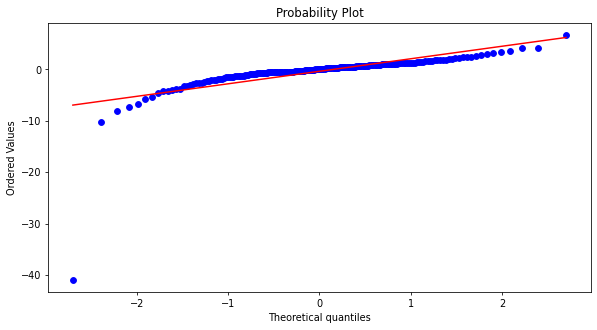

In [248]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=70)
_ = scipy.stats.probplot(x=random_residuals, plot=ax)
plt.plot()

In [249]:
xg_residuals = residuals = y_test - xg_pred

[]

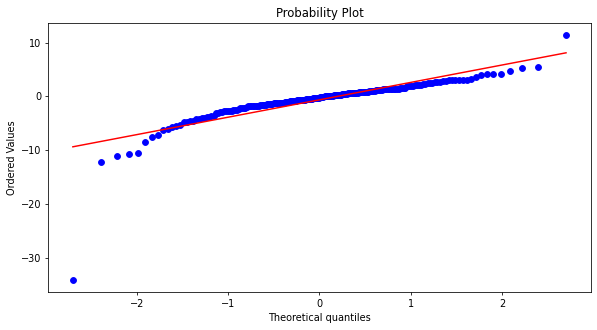

In [250]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=70)
_ = scipy.stats.probplot(x=xg_residuals, plot=ax)
plt.plot()